# Karar Ağaçları (Decision Tree)

**Aynı tahmin algoritmasında olduğu gibi bölgeler oluşturuluyor. O bölgelerdekilerin hepsi kadın diyelim. Aranan değer o bölgeye denk gelirse bu kişi kadın olarak sınıflandırılıyor.**

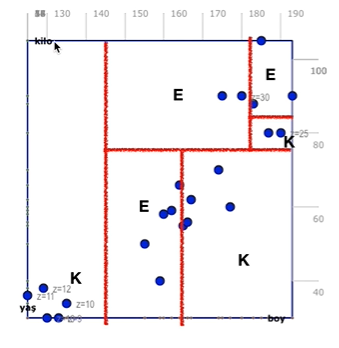

**Mesela burada boy 1.60, kilo 85 ise bu kişi erkektir diye sınıflandırılıyor.**

**Sınıflandırma yöntemi için daha uygundur. Hatta tahmin algoritmasında da sınıflandırma yöntemi kullanılır.**

**Mesela bir bölgede 3 erkek, 2 kadın var. O zaman ne yapabiliriz? 2 çözüm var: Birincisi, o bölgenin daha fazla alt bölmeye ayrılmaması. Eğer o bölgede 3 kadın varsa gelen kişinin de kadın olarak kabul edilmesi(majority voting). İkincisi, daha fazla küçük bölmelere bölüp daha da detaylı bölmeler haline getiririz. O bölgede sadece kadın kalana kadar veya o bölgede sadece erkek kalana kadar bölme işlemine devam edilecek. Bu iki yaklaşımdan birisi seçilmeli**

**Çok fazla veri olduğu zaman çok fazla detay vardır. O zaman daha küçük parçalara bölme işlemi çok daha bölme işlemi yapılacağı için overfitting riski var. O zaman dt örnek örnek ezberlemeye başlıyor. Ezberleme yapmış oluyor, bu bir tehlike. Aksi halde ise o bölgede çok fazla detay var ve biz bu detayları ihmal edip o bölgeye tek bir sınıf diyoruz. Diyelim %60 erkek, %40 kadın. O bölgeye gelen bir veriye direkt erkek diyoruz dolayısıyla kadın özelliklerini makinemiz öğrenmemiş oluyor.**

**Naif bayesteki örneğe göre dt uygulayalım. Bunun için ID3 algoritması kullanacağız.**

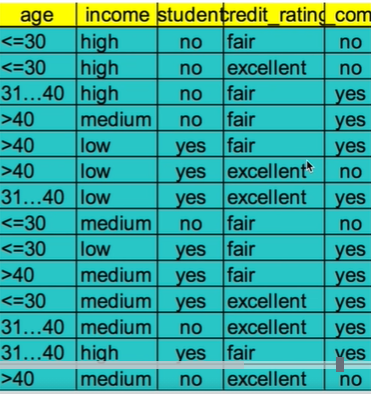

**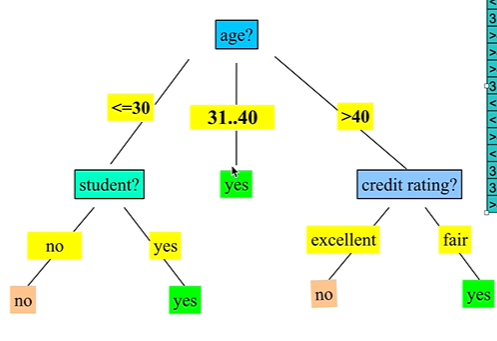**

**O örneğe karar ağacı uygularsak böyle bir şekil ortaya çıkar. Mesela yaş 40'tan büyük ve credit rating fair ise o kişi bilgisayar alır. Bu veriden öğrenerek çıkarabileceği karar ağacı. Sayısal değerleri sınıflandırma yapacakken başka bir algoritma çalışıyor ancak bu örnekte numerik bir değer yok, binomial veriler var.**

**Peki bu karar ağacı nasıl çizilecek? Bağımsız değişken yaş ile başladı ancak öğrenci ile de başlayabilirdi. Buna nasıl karar vereceğiz?**

**Entropi kavramından yararlanırız. Information Gain'i kullanarak olasılıkları değerlendiririz. Bilgisayar aldı veya almadı, olasılıksal dağılımını veriyor ve bunu log 2 tabanındaki değeri ile çarpıyor.**

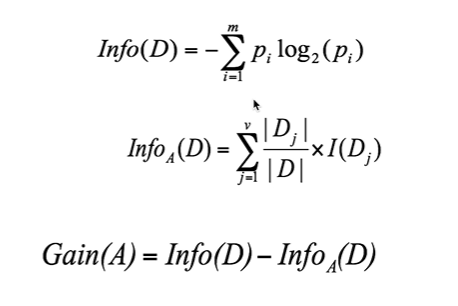

**Daha sonra her bir örneğin, her bir durumun çıkarttığı değeri information ile çarpacağız.**

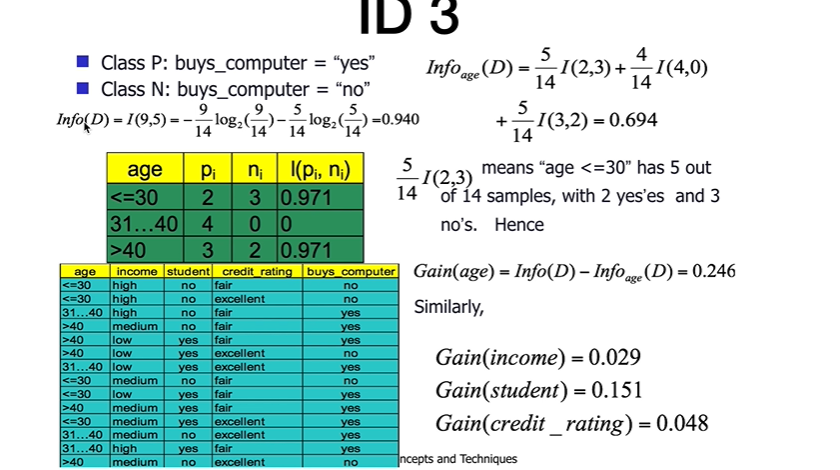

**Yani 9 kişi bilgisayar aldı, 5 kişi almadı. Dağılım I(9,5). 9 kişi almış X log 2 tabanındaki karşılığı - 5 kişi almamış X log 2 tabanındaki karşılığı = I(9,5)**

**Bu değer bizim genel olarak ürettiğimiz IG değeri olarak düşünülebilir. Daha sonra yaş, öğrenci vb. sınıflarda verinin ne kadar düzgün dağıldığını bulmak için tüm sınıfların IG'sini buluyoruz. Yaş kolonunu örnek alırsak 3 farklı devam kolonu var: 30'un altı, 30-40 arası, 40'ın üstü. Her birisi için devam yolunu hesaplıyor. 5/14 kısmı(30'un altında 5 kişi var) bunların 2 tanesi almış, 3 tanesi almamış(I(2,3)) + diğer yaşlar. I değerleri ile birlikte sonuca ulaşırız. Daha sonra yaş'ın info değerini bulduğumuz genel info değerinden çıkarıyoruz. Artık yaşın information gain'inini bulmuş oluyoruz.**

**Daha sonra bu hesaplamaları kalan tüm kolonlara da yapıyoruz. Neticede en fazla IG yapan kolonu yani yaş kolonunu seçeceğiz. O zaman bağımsız değişken yaş kolonu olacak. Bu sayede yukarıdaki şekli ortaya çıkarıyoruz.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
datas = pd.read_csv("veriler.csv")
datas

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [5]:
bky = datas.iloc[:, 1:4]
cins = datas.iloc[:, -1]

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(bky, cins, test_size=0.33, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

**Karar ağacı nesnesi oluşturuken kullanacağımız parametre var: criterion**

**Bu parametre 2 farklı değer alabilir. Default olarak gini alır ancak ayrıca entropy de alabilir.**

**İkisi arasındaki fark: ID3 algoritmasını kullanırken o olasılığın log 2 tabanındaki karşılığı ile çarpılmasını buluyorduk. Entropide bu değer log 2 tabanındaki karşılığı ile çarpılır ancak ginide log 2 operatörü kullanılmaz. yani o pi'nin karesi olarak işlem yapılır. Aslında çok büyük bir fark yok ikisi arasında. Bazı veri kümeleri arasında hassasiyet oluşturabiliyor.**

In [8]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)
print(ypred)
print(ytest)

['e' 'k' 'k' 'k' 'e' 'k' 'k' 'k']
20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object


In [10]:
cm = confusion_matrix(ytest, ypred)
cm
#8 veriden 7'si güzelce sınıflandırıldı entropy ile

array([[1, 0],
       [1, 6]], dtype=int64)

In [11]:
#bir de gini olarak bulalım
dtc1 = DecisionTreeClassifier(criterion="gini")
dtc1.fit(xtrain, ytrain)
ypred1 = dtc1.predict(xtest)
print(ypred1)
print(ytest)

['e' 'k' 'k' 'k' 'e' 'k' 'k' 'k']
20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object


In [13]:
cm1 = confusion_matrix(ytest, ypred1)
cm1
#yine aynı sonuca ulaştık!

array([[1, 0],
       [1, 6]], dtype=int64)